# 

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the paths to your image directories
categories = ['AROP1 TRAIN', 'AROP2 TRAIN', 'NORMAL ROP TRAIN']
base_path = '/kaggle/input/btp-train/BTP TRAIN'

# Create an empty list to store images and their labels
data = []
labels = []


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

# Define a function to load and preprocess images
def load_images_and_labels(category_index, category_path):
    for filename in os.listdir(category_path):
        img_path = os.path.join(category_path, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        data.append(img)
        labels.append(category_index)

# Load images and labels for each category
for category_index, category in enumerate(categories):
    category_path = os.path.join(base_path, category)
    load_images_and_labels(category_index, category_path)

# Convert data and labels to NumPy arrays
data = np.array(data, dtype='float32')
labels = np.array(labels)

# Normalize the pixel values to the range [0, 1]
data /= 255.0

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)




In [3]:
# Define a convolutional neural network model
model = keras.Sequential([
    layers.Input(shape=(128, 128, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(categories), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Save the trained model
model.save('image_classification_model.h5')

Epoch 1/10
526/526 [==============================] - 19s 15ms/step - loss: 0.1422 - accuracy: 0.9572 - val_loss: 0.0460 - val_accuracy: 0.9879
Epoch 2/10
526/526 [==============================] - 7s 13ms/step - loss: 0.0373 - accuracy: 0.9891 - val_loss: 0.0508 - val_accuracy: 0.9810
Epoch 3/10
526/526 [==============================] - 7s 13ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0155 - val_accuracy: 0.9955
Epoch 4/10
526/526 [==============================] - 7s 13ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0157 - val_accuracy: 0.9948
Epoch 5/10
526/526 [==============================] - 7s 13ms/step - loss: 0.0145 - accuracy: 0.9961 - val_loss: 0.0215 - val_accuracy: 0.9941
Epoch 6/10
526/526 [==============================] - 7s 13ms/step - loss: 0.0080 - accuracy: 0.9982 - val_loss: 0.0089 - val_accuracy: 0.9971
Epoch 7/10
526/526 [==============================] - 7s 13ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0112 - val_accuracy: 0.996

658/658 [==============================] - 2s 3ms/step


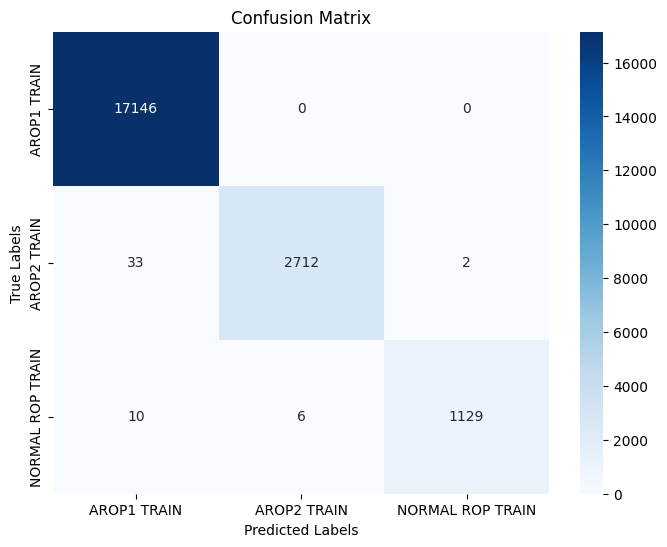

                  precision    recall  f1-score   support

     AROP1 TRAIN       1.00      1.00      1.00     17146
     AROP2 TRAIN       1.00      0.99      0.99      2747
NORMAL ROP TRAIN       1.00      0.99      0.99      1145

        accuracy                           1.00     21038
       macro avg       1.00      0.99      0.99     21038
    weighted avg       1.00      1.00      1.00     21038



In [6]:
import os
import cv2
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the paths to your test image directories
test_categories = ['AROP1 TRAIN', 'AROP2 TRAIN', 'NORMAL ROP TRAIN']
test_base_path = '/kaggle/input/btp-train/BTP TRAIN'

# Load the saved model
model = keras.models.load_model('image_classification_model.h5')

# Create an empty list to store test images and their labels
test_data = []
test_labels = []

# Define a function to load and preprocess test images
def load_test_images_and_labels(category_index, category_path):
    for filename in os.listdir(category_path):
        img_path = os.path.join(category_path, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (128, 128))  # Resize the image to match the model input size
        test_data.append(img)
        test_labels.append(category_index)

# Load test images and labels for each category
for category_index, category in enumerate(test_categories):
    test_category_path = os.path.join(test_base_path, category)
    load_test_images_and_labels(category_index, test_category_path)

# Convert test data and labels to NumPy arrays
test_data = np.array(test_data, dtype='float32')
test_labels = np.array(test_labels)

# Normalize the pixel values to the range [0, 1]
test_data /= 255.0

# Make predictions on the test data
predictions = model.predict(test_data)

# Convert predictions to class labels (0, 1, 2)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_categories, yticklabels=test_categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(test_labels, predicted_labels, target_names=test_categories)
print(class_report)
